In [1]:
# To predict Medain House Value

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
df = pd.read_csv('housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']

In [11]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [12]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [14]:
train_data = x_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
2453,-119.55,36.52,31.0,1986.0,417.0,1042.0,422.0,3.0294,INLAND,70200.0
10826,-117.93,33.65,27.0,1283.0,406.0,1063.0,376.0,2.7500,<1H OCEAN,275000.0
8820,-118.35,34.09,35.0,1989.0,634.0,1108.0,593.0,1.6081,<1H OCEAN,288900.0
13766,-117.08,34.08,34.0,45.0,11.0,39.0,14.0,3.0625,INLAND,500001.0
17724,-121.78,37.33,10.0,2829.0,394.0,1510.0,386.0,6.6800,<1H OCEAN,359500.0
...,...,...,...,...,...,...,...,...,...,...
18691,-121.77,36.96,20.0,4228.0,816.0,2389.0,844.0,3.5250,<1H OCEAN,229100.0
2880,-118.97,35.38,35.0,1673.0,426.0,1041.0,413.0,1.3750,INLAND,57500.0
774,-122.11,37.66,35.0,2843.0,652.0,1726.0,643.0,3.0900,NEAR BAY,174100.0
12561,-121.46,38.55,40.0,2077.0,435.0,1454.0,385.0,2.0074,INLAND,57000.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

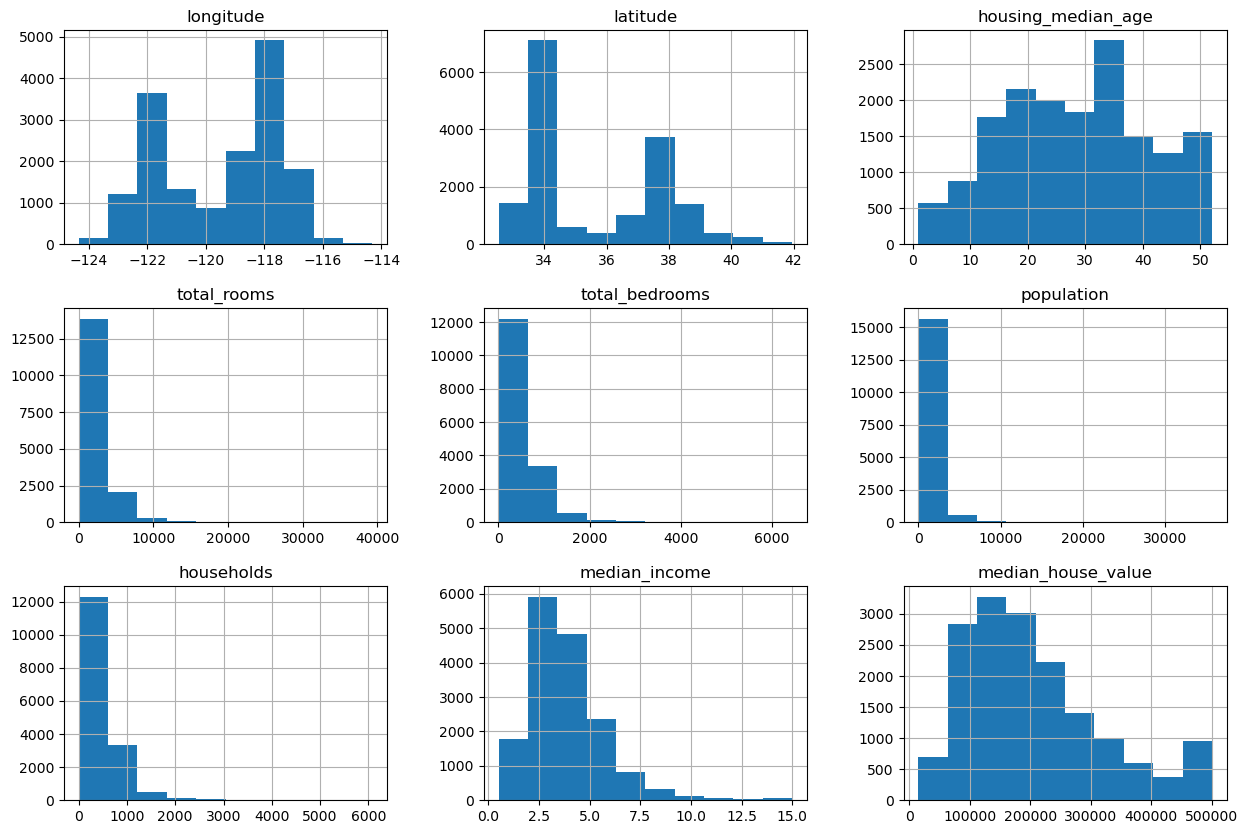

In [15]:
train_data.hist(figsize=(15,10))

In [16]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7260
INLAND        5204
NEAR OCEAN    2082
NEAR BAY      1797
ISLAND           3
Name: count, dtype: int64

In [17]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity).astype(int)).drop(['ocean_proximity'], axis=1)

In [18]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
2453,-119.55,36.52,31.0,1986.0,417.0,1042.0,422.0,3.0294,70200.0,0,1,0,0,0
10826,-117.93,33.65,27.0,1283.0,406.0,1063.0,376.0,2.7500,275000.0,1,0,0,0,0
8820,-118.35,34.09,35.0,1989.0,634.0,1108.0,593.0,1.6081,288900.0,1,0,0,0,0
13766,-117.08,34.08,34.0,45.0,11.0,39.0,14.0,3.0625,500001.0,0,1,0,0,0
17724,-121.78,37.33,10.0,2829.0,394.0,1510.0,386.0,6.6800,359500.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18691,-121.77,36.96,20.0,4228.0,816.0,2389.0,844.0,3.5250,229100.0,1,0,0,0,0
2880,-118.97,35.38,35.0,1673.0,426.0,1041.0,413.0,1.3750,57500.0,0,1,0,0,0
774,-122.11,37.66,35.0,2843.0,652.0,1726.0,643.0,3.0900,174100.0,0,0,0,1,0
12561,-121.46,38.55,40.0,2077.0,435.0,1454.0,385.0,2.0074,57000.0,0,1,0,0,0


<Axes: >

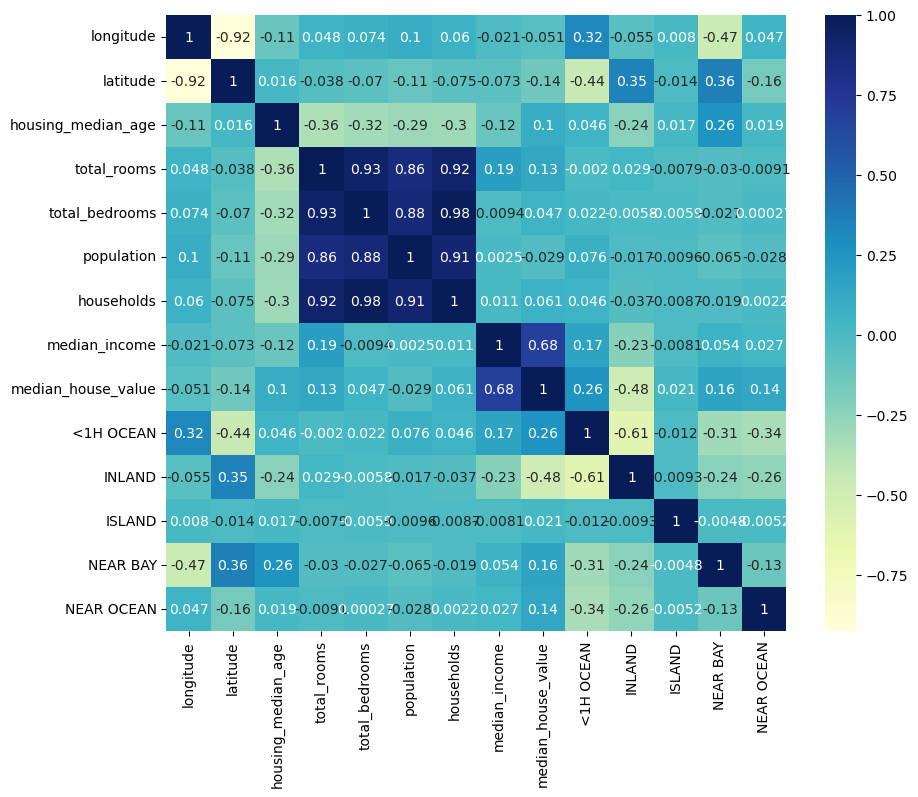

In [19]:
plt.figure(figsize=(10,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

In [20]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_rooms'] + 1)
train_data['population'] = np.log(train_data['total_rooms'] + 1)
train_data['households'] = np.log(train_data['total_rooms'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': 'median_house_value'}>,
        <Axes: title={'center': '<1H OCEAN'}>,
        <Axes: title={'center': 'INLAND'}>,
        <Axes: title={'center': 'ISLAND'}>],
       [<Axes: title={'center': 'NEAR BAY'}>,
        <Axes: title={'center': 'NEAR OCEAN'}>, <Axes: >, <Axes: >]],
      dtype=object)

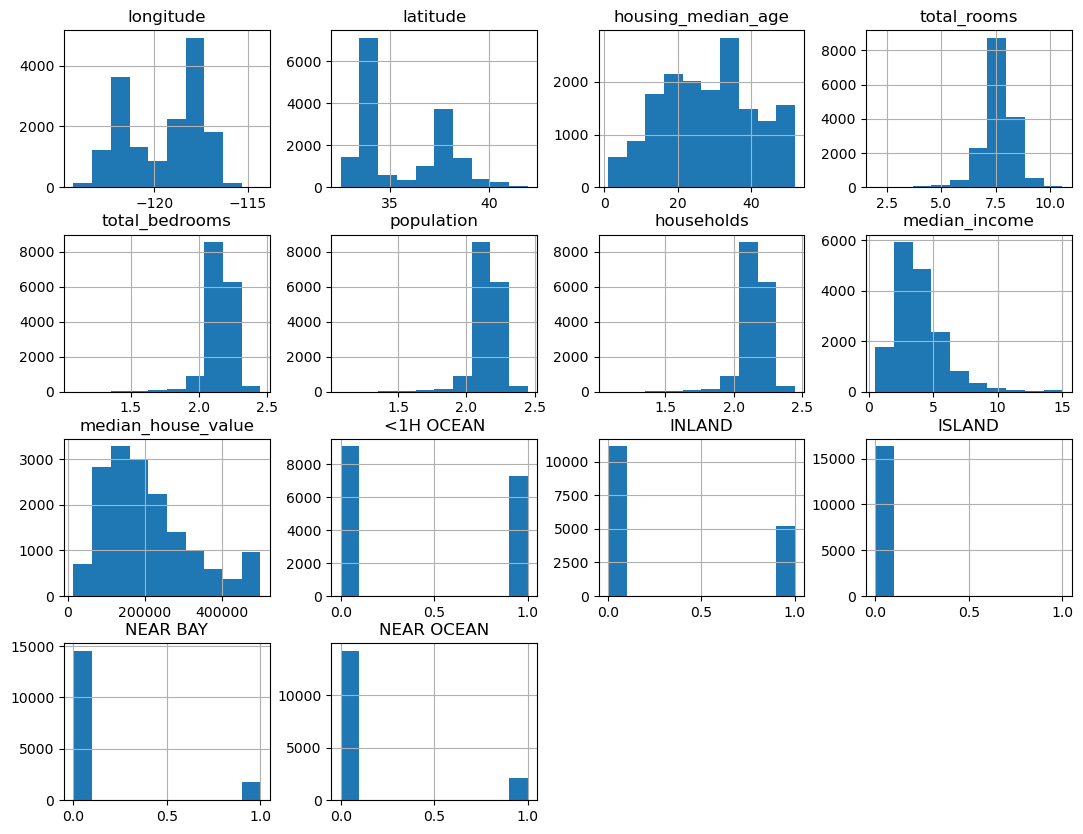

In [21]:
train_data.hist(figsize=(13,10))

<Axes: xlabel='latitude', ylabel='longitude'>

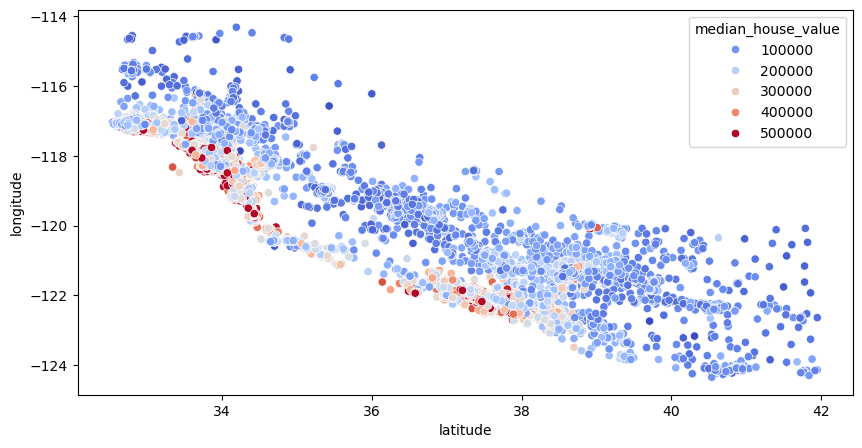

In [22]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value', palette='coolwarm')

In [23]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

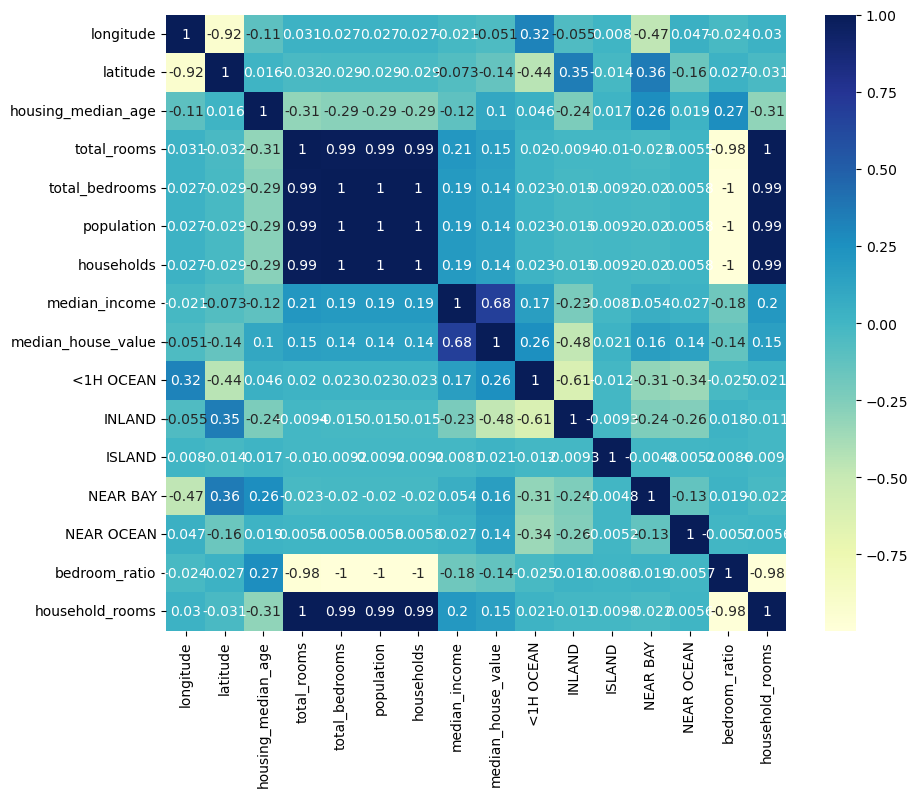

In [24]:
plt.figure(figsize=(10,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

In [25]:
x_train = train_data.drop(['median_house_value'], axis=1)

In [26]:
y_train = train_data['median_house_value']

In [27]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [40]:
lr.fit(x_train_scale, y_train)

LinearRegression()

In [38]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [39]:
x_train_scale = ss.fit_transform(x_train)

In [30]:
test_data = x_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_rooms'] + 1)
test_data['population'] = np.log(test_data['total_rooms'] + 1)
test_data['households'] = np.log(test_data['total_rooms'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity).astype(int)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

In [31]:
x_test = test_data.drop(['median_house_value'], axis=1)

In [32]:
y_test = test_data['median_house_value']

In [41]:
x_test_scale = ss.transform(x_test)

In [42]:
lr.score(x_test_scale, y_test)

0.6208059375488078

In [43]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

In [44]:
rfr.fit(x_train, y_train)

RandomForestRegressor()

In [45]:
rfr.score(x_test, y_test)

0.8299523175766131

In [48]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators':[3,10,30],
              'max_features':[2,4,6,8]}

grid_search = GridSearchCV(rfr, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

grid_search.fit(x_train_scale, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [50]:
best_forest = grid_search.best_estimator_

In [52]:
best_forest.score(x_test_scale, y_test)

0.8245147157099622